---
# ***Neural Network - Stone's Attempt***
---

In [4]:
%load_ext autoreload
%autoreload 2

import os
import sys
import warnings

# while any(marker in os.getcwd() for marker in ['Project4']):
#     os.chdir("..")

# sys.path.append('classes_and_functions_p3')

current_directory = os.getcwd()
current_directory

'c:\\Users\\barto\\Desktop\\Repos\\MachineLearning\\Project4'

## Import stuff

In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

## The fun is over

In [2]:
# Set up paths
image_folder = "Project4\trainset2"
excel_file = "Labels.csv"

# Load the Excel file
df = pd.read_csv(excel_file)
df.head()

,ImageId,ClassName
0,f27632d7e5 resized.jpg,water
1,efa87919ed resized.jpg,pizza-margherita-baked
2,4f169e8c8d resized.jpg,broccoli
3,a6956654bf resized.jpg,salad-leaf-salad-green
4,d99ce8c3bf resized.jpg,egg


In [25]:
len(df['ClassName'].unique())

61

In [3]:
# Set up paths
image_folder = r"C:\Users\barto\Desktop\Repos\MachineLearning\Project4\trainset1"
excel_file = r"Labels.csv"

# Load the Excel file
df = pd.read_csv(excel_file)

# Prepare a dictionary to store image arrays and labels
image_data = []
labels = []

# Function to preprocess images (convert to array)
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")  # Ensure it's RGB
    return np.array(image)  # No resizing needed since all images are 190x190

# Iterate through the Excel rows
for index, row in df.iterrows():
    image_id = row['ImageId']
    classification = row['ClassName']
    
    # Construct the image path
    image_path = os.path.join(image_folder, f"{image_id}")
    
    # Check if the image exists
    if os.path.exists(image_path):
        try:
            # Convert the image to an array
            image_array = preprocess_image(image_path)
            image_data.append(image_array)
            labels.append(classification)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
    else:
        print(f"Image {image_path} not found.")

# Convert lists to numpy arrays for machine learning use
image_data = np.array(image_data)
labels = np.array(labels)

print("Image data shape:", image_data.shape)
print("Labels shape:", labels.shape)


Image C:\Users\barto\Desktop\Repos\MachineLearning\Project4\trainset1\f27632d7e5 resized.jpg not found.
Image C:\Users\barto\Desktop\Repos\MachineLearning\Project4\trainset1\efa87919ed resized.jpg not found.
Image C:\Users\barto\Desktop\Repos\MachineLearning\Project4\trainset1\a6956654bf resized.jpg not found.
Image C:\Users\barto\Desktop\Repos\MachineLearning\Project4\trainset1\d99ce8c3bf resized.jpg not found.
Image C:\Users\barto\Desktop\Repos\MachineLearning\Project4\trainset1\ffcfba255c resized.jpg not found.
Image C:\Users\barto\Desktop\Repos\MachineLearning\Project4\trainset1\b0687e0bfc resized.jpg not found.
Image C:\Users\barto\Desktop\Repos\MachineLearning\Project4\trainset1\d6dc2e4278 resized.jpg not found.
Image C:\Users\barto\Desktop\Repos\MachineLearning\Project4\trainset1\495410143a resized.jpg not found.
Image C:\Users\barto\Desktop\Repos\MachineLearning\Project4\trainset1\d9579ddc0b resized.jpg not found.
Image C:\Users\barto\Desktop\Repos\MachineLearning\Project4\trai

In [4]:
# Set up paths
image_folder2 = r"C:\Users\barto\Desktop\Repos\MachineLearning\Project4\trainset2"

# Prepare a dictionary to store image arrays and labels
image_data2 = []
labels2 = []
# Iterate through the Excel rows
for index, row in df.iterrows():
    image_id = row['ImageId']
    classification = row['ClassName']
    
    # Construct the image path
    image_path2 = os.path.join(image_folder2, f"{image_id}")
    
    # Check if the image exists
    if os.path.exists(image_path2):
        try:
            # Convert the image to an array
            image_array2 = preprocess_image(image_path2)
            image_data2.append(image_array2)
            labels2.append(classification)
        except Exception as e:
            print(f"Error processing {image_path2}: {e}")
    else:
        print(f"Image {image_path2} not found.")

# Convert lists to numpy arrays for machine learning use
image_data2 = np.array(image_data2)
labels2 = np.array(labels2)

print("Image data shape:", image_data2.shape)
print("Labels shape:", labels2.shape)

Image C:\Users\barto\Desktop\Repos\MachineLearning\Project4\trainset2\4f169e8c8d resized.jpg not found.
Image C:\Users\barto\Desktop\Repos\MachineLearning\Project4\trainset2\0c2b1641a8 resized.jpg not found.
Image C:\Users\barto\Desktop\Repos\MachineLearning\Project4\trainset2\3f7e5ed3a9 resized.jpg not found.
Image C:\Users\barto\Desktop\Repos\MachineLearning\Project4\trainset2\236b534c7c resized.jpg not found.
Image C:\Users\barto\Desktop\Repos\MachineLearning\Project4\trainset2\5fbcb6b69d resized.jpg not found.
Image C:\Users\barto\Desktop\Repos\MachineLearning\Project4\trainset2\577a2f73c3 resized.jpg not found.
Image C:\Users\barto\Desktop\Repos\MachineLearning\Project4\trainset2\16d301e694 resized.jpg not found.
Image C:\Users\barto\Desktop\Repos\MachineLearning\Project4\trainset2\463cd98cc7 resized.jpg not found.
Image C:\Users\barto\Desktop\Repos\MachineLearning\Project4\trainset2\724ee81cc5 resized.jpg not found.
Image C:\Users\barto\Desktop\Repos\MachineLearning\Project4\trai

In [36]:
image_data[0, :, :, 1]

array([[ 71,  74,  72, ..., 199, 209, 205],
       [ 70,  73,  74, ..., 202, 210, 207],
       [ 69,  75,  80, ..., 203, 204, 201],
       ...,
       [ 59,  59,  57, ..., 165, 171, 179],
       [ 57,  60,  60, ..., 103, 154, 165],
       [ 55,  59,  59, ...,  16,  72, 118]], dtype=uint8)

In [37]:
labels

array(['broccoli', 'butter', 'bread-white', ..., 'egg', 'butter',
       'broccoli'], dtype='<U33')

In [8]:
class NeuralNetwork:
    def __init__(self, input_size = 190*190*3, hidden_layers = [2700, 2700, 2700], output_size = 61):
        self.inpute_size = input_size
        self.hidden_layers = hidden_layers
        self.output_size = output_size
        self.weights = []
        self.biases = []

        self.weights.append(0.01 * np.random.randn(input_size, hidden_layers[0]))
        self.biases.append(np.zeros((1, hidden_layers[0])))

        for i in range(len(hidden_layers) - 1):
            self.weights.append(0.01 * np.random.randn(hidden_layers[i], hidden_layers[i+1]))
            self.biases.append(np.zeros((1, hidden_layers[i+1])))
        
        self.weights.append(0.01 * np.random.randn(hidden_layers[len(hidden_layers)-1], output_size))
        self.biases.append(np.zeros((1, output_size)))

    def relu(self, x):
        """ReLU activation function."""
        return np.maximum(0, x)

    def softmax(self, x):
        """Softmax activation function."""
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))  # Stability trick
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def cross_entropy_loss(self, y_true, y_pred):
        # Avoid log(0) by adding a small epsilon
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # to avoid log(0)
        
        m = y_true.shape[0]  # batch size
        loss = -np.sum(y_true * np.log(y_pred)) / m
        return loss

    def forward(self, inputs):
        layers = [inputs]

        # Apply ReLU activation for hidden layers
        for i in range(len(self.weights) - 1):
            z = np.dot(layers[-1], self.weights[i]) + self.biases[i]
            a = self.relu(z)
            layers.append(a)

        # Output layer with softmax activation
        z = np.dot(layers[-1], self.weights[-1]) + self.biases[-1]
        output = self.softmax(z)
        layers.append(output)

        return layers

    def backward(self, X_train, y_train, layers, learning_rate):
        m = X_train.shape[0]  # batch size
        y_pred = layers[-1]
        # Output layer gradient (with softmax)
        dZ = y_pred - y_train  # (batch_size, 61) 
        dW = (layers[-2].T @ dZ) / m  # Shape (input_size, 61)
        db = np.sum(dZ, axis=0, keepdims=True) / m  # Shape (1, 61)
        
        # Update weights and biases for output layer
        self.weights[-1] -= learning_rate * dW
        self.biases[-1] -= learning_rate * db
        
        # Backpropagate through the hidden layers
        for i in range(len(self.hidden_layers)-1, -2, -1):
            print(i)
            print(self.weights[i].T.shape)
            dA = np.dot(dZ, self.weights[i+1].T)  # Gradient w.r.t. the activation from next layer
            dZ = dA * (layers[i+1] > 0)  # ReLU derivative
            dW = np.dot(layers[i+1].T, dZ) / m  # Gradient w.r.t. weights
            db = np.sum(dZ, axis=0, keepdims=True) / m  # Gradient w.r.t. biases

            # Update weights and biases for hidden layers
            self.weights[i] -= learning_rate * dW
            self.biases[i] -= learning_rate * db

    def train(self, X_train, y_train, num_epochs=10, learning_rate=0.01):
        # Training loop
        for epoch in range(num_epochs):
            # Forward pass
            layers = self.forward(X_train)
            y_pred = layers[-1]

            # Calculate loss
            loss = self.cross_entropy_loss(y_train, y_pred)

            # Backward pass (gradient calculation and parameter update)
            self.backward(X_train, y_train, layers, learning_rate)

            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss}')
    
    def calculate_accuracy(self, y_true, y_pred):
        """Calculate accuracy."""
        # Predicted class is the class with the highest probability
        predicted_classes = np.argmax(y_pred, axis=1)
        true_classes = np.argmax(y_true, axis=1)
        
        # Accuracy is the percentage of correct predictions
        accuracy = np.mean(predicted_classes == true_classes) * 100
        return accuracy

NN = NeuralNetwork()

In [6]:
flattened_images = image_data.reshape(image_data.shape[0], -1)

from sklearn.preprocessing import LabelEncoder

# Assuming labels is a list or array of string labels
label_encoder = LabelEncoder()

# Convert string labels to numeric labels
labels_numeric = label_encoder.fit_transform(labels)

# Create one-hot encoding for the labels
y_train_one_hot = np.zeros((labels_numeric.size, 61))
y_train_one_hot[np.arange(labels_numeric.size), labels_numeric] = 1

X_train, X_test, y_train, y_test = train_test_split(flattened_images, y_train_one_hot, test_size=0.2, random_state=42)

NeuronalNetworking = NeuralNetwork()
outputek = NeuronalNetworking.forward(X_train[190])

In [9]:
NN.backward(X_train[190], y_train[190], outputek, learning_rate=0.01)

2
(2700, 2700)
1
(2700, 2700)
0
(2700, 108300)


ValueError: operands could not be broadcast together with shapes (108300,2700) (2700,2700) (108300,2700) 

In [146]:
NN.weights[0].T.shape

(2700, 108300)

In [143]:
for i in range(2, -1, -1):
    print(i)

2
1
0


In [121]:
NN.train(X_train, y_train)

1
1
Epoch 1/10, Loss: 33.96148477638868
1
1
Epoch 2/10, Loss: 31.155219663393897
1
1
Epoch 3/10, Loss: 32.34761766817542
1
1
Epoch 4/10, Loss: 31.155219663393897
1
1
Epoch 5/10, Loss: 32.34761766817542
1
1
Epoch 6/10, Loss: 31.155219663393897
1
1
Epoch 7/10, Loss: 32.34761766817542
1
1
Epoch 8/10, Loss: 31.155219663393897
1
1
Epoch 9/10, Loss: 32.34761766817542
1
1
Epoch 10/10, Loss: 31.155219663393897


In [123]:
NN.calculate_accuracy(y_test, NN.forward(X_test)[-1])

6.132075471698113

In [112]:
outputek[3].shape

(1, 61)

In [85]:
len(flattened_images[0, :])

108300

In [26]:
flattened_images = image_data.reshape(image_data.shape[0], -1)

print("Before flattening:", image_data.shape)
print("After flattening:", flattened_images.shape)

Before flattening: (4237, 190, 190, 3)
After flattening: (4237, 108300)


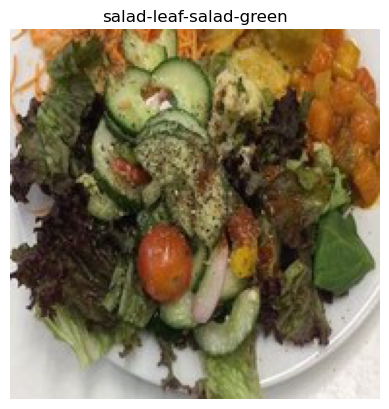

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

number = 3100
plt.imshow(image_data[number, :, :, :])
plt.title(f"{labels[number]}")
plt.axis('off')  # Turn off axis for a cleaner look
plt.show()